In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
iris = pd.read_csv(r"C:\Users\Arun\Downloads\irisdata.csv")
iris.head()  

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [4]:
iris.head()  


,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_id      0
dtype: int64

In [8]:
iris.value_counts()

sepal_length  sepal_width  petal_length  petal_width  species     species_id
4.9           3.1          1.5           0.1          setosa      1             3
5.8           2.7          5.1           1.9          virginica   3             2
              4.0          1.2           0.2          setosa      1             1
5.9           3.0          4.2           1.5          versicolor  2             1
6.2           3.4          5.4           2.3          virginica   3             1
                                                                               ..
5.5           2.3          4.0           1.3          versicolor  2             1
              2.4          3.7           1.0          versicolor  2             1
                           3.8           1.1          versicolor  2             1
              2.5          4.0           1.3          versicolor  2             1
7.9           3.8          6.4           2.0          virginica   3             1
Length: 147, dtype: i

In [9]:
iris.corr()


,sepal_length,sepal_width,petal_length,petal_width,species_id
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species_id,0.782561,-0.419446,0.949043,0.956464,1.000000


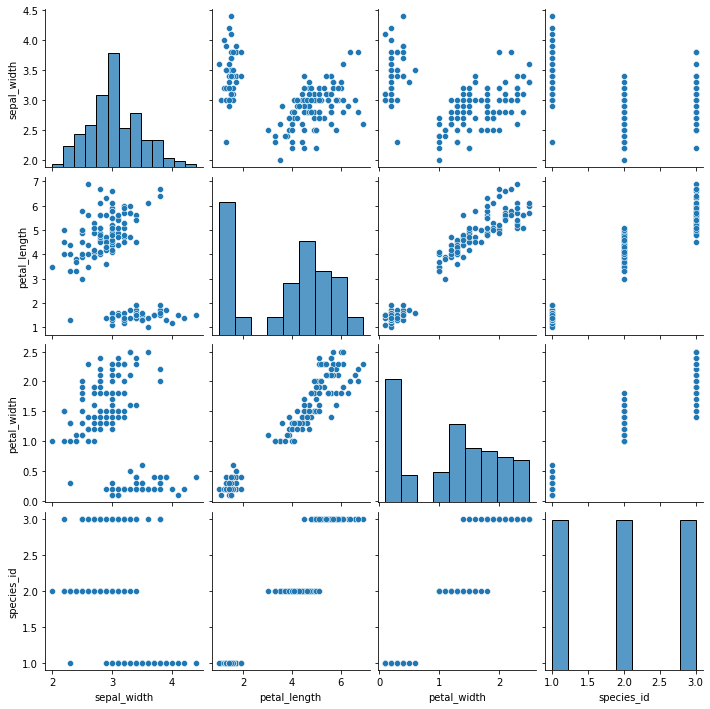

In [10]:
sns.pairplot(iris.iloc[:,1:])

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'species_id'}>, <AxesSubplot:>]],
      dtype=object)

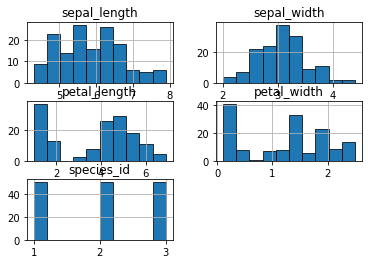

In [11]:
iris.hist(edgecolor="black", linewidth=0.75)

<AxesSubplot:>

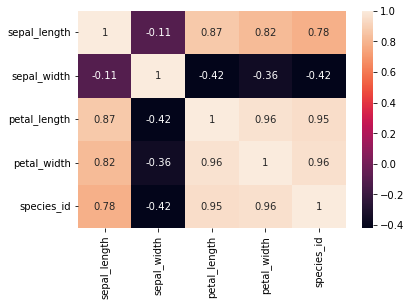

In [12]:
sns.heatmap(iris.corr(),annot=True)

In [13]:
feature_cols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x=iris[feature_cols]
y=iris.species

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
dtc=DecisionTreeClassifier()
dtc=dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy: 0.9555555555555556


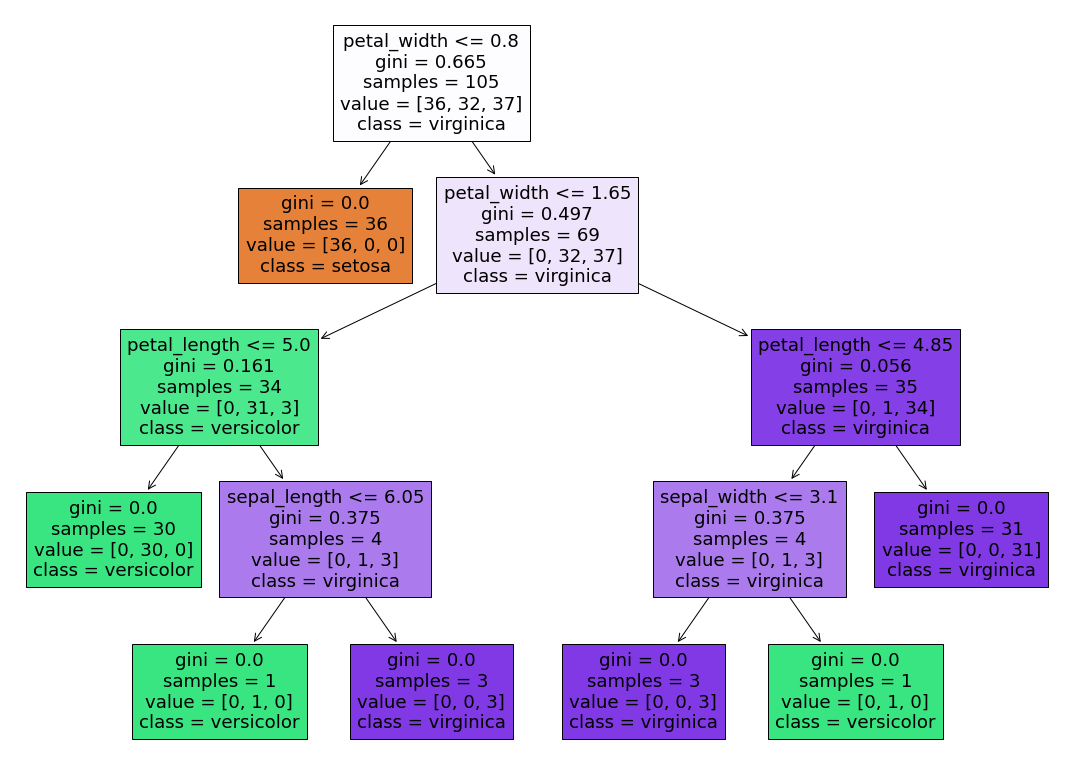

In [15]:
features = iris.columns[:-1]
classes = iris['species'].unique().tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(19, 14))
plot_tree(dtc, feature_names=features, class_names=classes, filled=True)
plt.show()
